The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


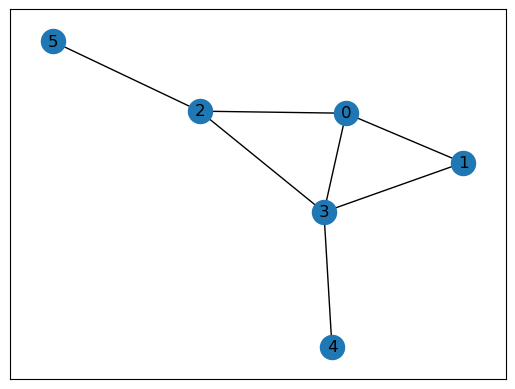

tensor([[ 0.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 3.,  0.],
        [-1.,  0.],
        [-2.,  0.]]) <bound method BaseData.edge_attrs of Data(edge_index=[2, 14], pos=[6, 2], visitTime=[6], x=[6, 2], edge_attr=[14, 1], agent_mask=[6])> tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 5],
        [1, 2, 3, 0, 3, 0, 3, 5, 0, 1, 2, 4, 3, 2]]) [False False False False  True False]


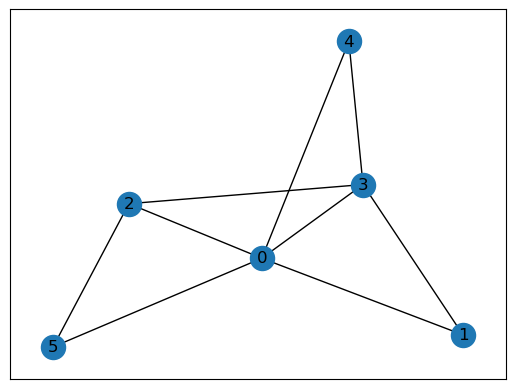

tensor([[ 0.,  3.],
        [ 1.,  3.],
        [ 2.,  3.],
        [ 3.,  3.],
        [-1.,  0.],
        [-2.,  0.]]) <bound method BaseData.edge_attrs of Data(edge_index=[2, 18], pos=[6, 2], visitTime=[6], x=[6, 2], edge_attr=[18, 1], agent_mask=[6])> tensor([[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5],
        [1, 2, 3, 4, 5, 0, 3, 0, 3, 5, 0, 1, 2, 4, 0, 3, 0, 2]]) [False False False False  True False]


In [14]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel
import numpy as np
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

patrolGraph = PatrolGraph("patrolling_zoo/env/4nodes.graph")
env = parallel_env(patrolGraph, 2,
                   speed = 5.0,
                   observation_radius=100,
                   observe_method="pyg",
                   observe_bitmap_dims = (40, 40),
                   require_explicit_visit=True
)

# observations, infos = env.reset(seed=42)

obs = env.observe(env.agents[0])[0]

g = to_networkx(obs, to_undirected=True)
nx.draw_networkx(g)
plt.show()
print(obs.x, obs.edge_attrs, obs.edge_index, obs.agent_mask)

actions = {agent: 0 for agent in env.agents}
env.step(actions)
env.step(actions)
env.step(actions)

obs = env.observe(env.agents[0])[0]
g = to_networkx(obs, to_undirected=True)
nx.draw_networkx(g)
plt.show()
print(obs.x, obs.edge_attrs, obs.edge_index, obs.agent_mask)

# print(observations)
# nx.draw_networkx(patrolGraph.graph)
# # Display the env.state() bitmap using matplotlib.
# import matplotlib.pyplot as plt
# import numpy as np

# state = env.state()
# bitmap = state

# graphLayer = bitmap[:,:,2]
# graphNodes = graphLayer[np.where(graphLayer >= 0)]
# print(f"Sum of node layer: {np.sum(graphNodes)}")
# print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

# agentLayer = bitmap[:,:,0]
# agents = agentLayer[np.where(agentLayer >= 0)]

# bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
# bitmap[np.where(graphLayer >= 0)] = 255
# bitmap[np.where(agentLayer >= 0)] = 0
# plt.imshow(bitmap, aspect="equal")

[0, 1, 2, 3] [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]


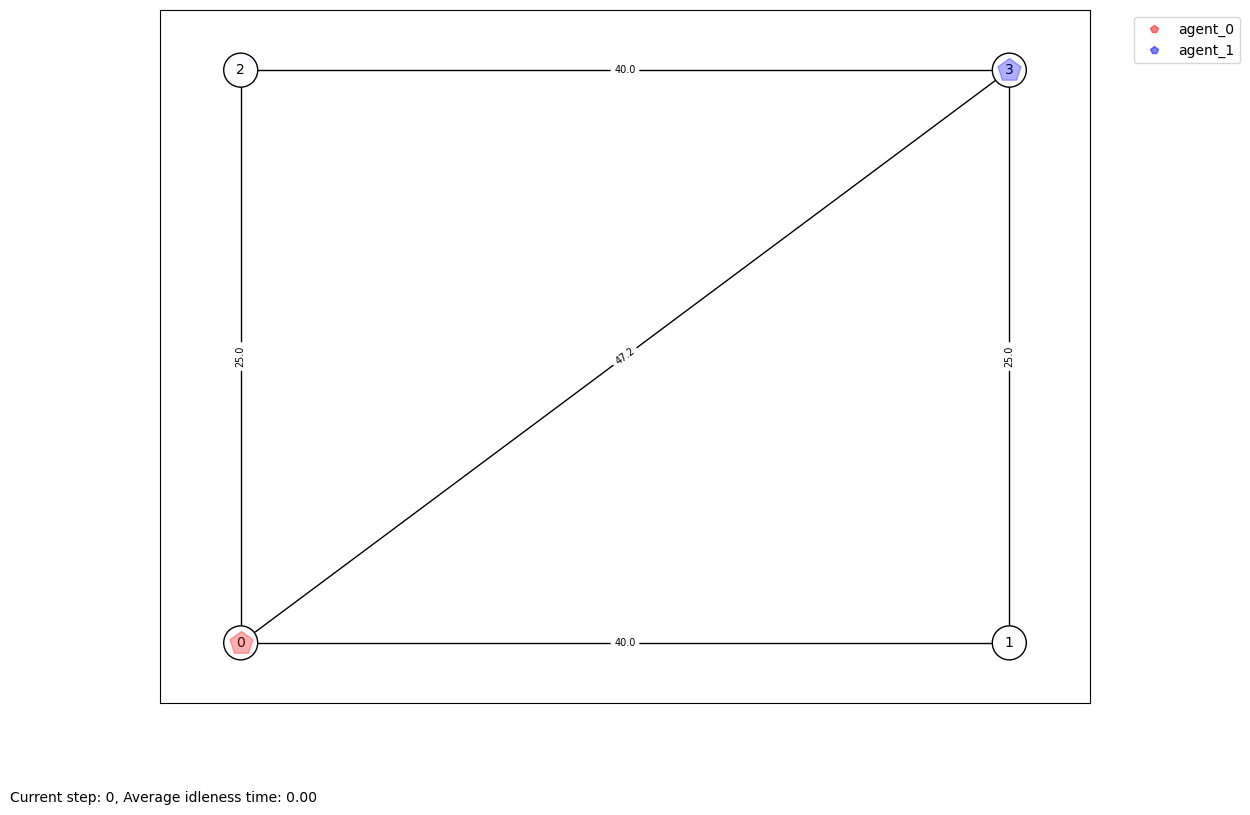

In [2]:
print(env.pg.graph.nodes, env.pg.graph.edges)
env.render()

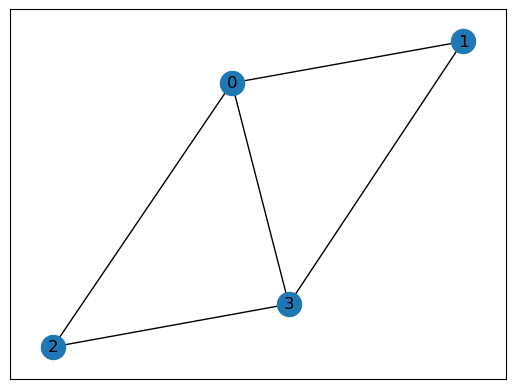

In [3]:
nx.draw_networkx(patrolGraph.graph)

In [ ]:
bitmap = env.observe(env.agents[0], radius=200)

graphLayer = bitmap[:,:,2]
graphNodes = graphLayer[np.where(graphLayer >= 0)]
print(f"Sum of node layer: {np.sum(graphNodes)}")
print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

agentLayer = bitmap[:,:,0]
agents = agentLayer[np.where(agentLayer >= 0)]

bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
bitmap[np.where(graphLayer >= 0)] = 255
bitmap[np.where(agentLayer >= 0)] = 0
plt.imshow(bitmap, aspect="equal")

In [ ]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 1,
                   speed = 40.0,
                #    observation_radius = 0,
                #    comms_model = CommunicationModel("bernoulli"),
                   require_explicit_visit=True
)

observations, infos = env.reset(seed=42)

print(infos)

# We temporarily fix the actions to a single node visit for each agent.
# actions = {agent: env.action_space(agent).sample() for agent in env.agents}
actions = {agent: 6 for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    print(infos)

    # clear_output(wait=True)
    env.render()

    # actions = {agent: 0 for agent in env.agents}
    i += 1
    if i >= 5:
        break
env.close()

In [ ]:
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")

pygGraph = patrolGraph.getPyTorchGeometricGraph()
print(pygGraph)
print(f"Graph has {pygGraph.num_nodes} nodes.")
print(pygGraph.get_tensor_size())